# MATH 578 Lab Assignment 1 <a class="tocSkip">


***Kai Yang***

Original assignment problems are put in *italic fonts*, my text answers are put in **bold fonts**. For both parts, the functions written are in the constructed classes. 

Another interesting thing to note is that, to run the entire thing on GPU, simply use `cupy` instead of `numpy` -- but for the purpose of the assignment, we will stay with `numpy`. 

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

# PART 1
*In this exercise, we will do an experimental study of the growth factor for Gaussian elimination with partial pivoting. Given the factorization $PA = LU$, deﬁne the growth factor by 
$$g\left(A\right)=\frac{\max_{i,j}\left|u_{ij}\right|}{\max_{i,j}\left|a_{ij}\right|}$$
where $u_{ij}$ and $a_{ij}$ are the elements of $U$ and $A$, respectively.*

**All codes for functions to answer problems in Part 1 are included in the following class `part1`.**

In [2]:
class part1:
    '''
    A class serves for part 1... it basically performs Gaussian elimination with partial pivoting for square matrices.
    '''
    def __init__(self, n, mu=0., sigma=1.):
        '''
        Constructor for the class, with arguments: 
            n:          int scalar; size of the matrix to be generated 
            mu:         float scalar; mean value for the Gaussian r.v.; by default it will be 0 
            sigma:      float scalar; standard deviation for the Gaussian r.v.; by default it will be 1 
        '''
        self.n = n
        self.mu = mu
        self.sigma = sigma

    def generate_mat(self):
        '''
        (Problem 2) Generate a n by n matrix whose entries are i.i.d. Gaussian r.v. with mean self.mu and standard deviation self.sigma. 
        '''
        self.A = np.random.normal(loc=self.mu,
                                  scale=self.sigma,
                                  size=(self.n, self.n))
        return self.A

    def PLU(self):
        '''
        (Problem 3) Perform Gaussian elimination with partial pivoting.
        '''
        self.generate_mat()
        self.U = self.A.copy()
        for k in np.arange(self.n - 1):
            pp_ind = np.argmax(
                np.abs(self.U[k:, k])
            ) + k  # find the index of row to swap with the current row k
            self.U[[k, pp_ind]] = self.U[[pp_ind, k]]  # partial pivoting step
            mulitplier = self.U[k + 1:,
                                k] / self.U[k, k]  # calculate the multiplier
            ge_mat = np.outer(mulitplier,
                              self.U[k, k + 1:])  # calculate the change matrix
            self.U[
                k + 1:,
                k] = 0  # note that calculation of mulitplier in above two lines already suggests that the element elimination by subtracting the change matrix, we therefore do not repeat calculation for computational efficiency and numerical accuracy
            self.U[k + 1:, k + 1:] -= ge_mat  # perform Gaussian elimination
        return self.U

    def growth(self):
        '''
        (Problem 4) Calculate growth factor.
        '''
        self.PLU()
        self.u = np.max(np.abs(self.U))
        self.a = np.max(np.abs(self.A))
        self.growth = self.u / self.a
        return self.growth

## Problem 1
*A relevant paper is L.N. Trefethen and R.S. Schreiber. Average-case stability of Gaussian elimination. Please read this paper in suﬃcient detail to understand the main points.*

**A paper using numerical studies to illustrate the stability of Gaussian elimination with partial/full pivoting. Main points are summarized in the conclusion section.**

## Problem 2 
*Write a function that takes $n$ as its parameter and generates an $n \times n$ matrix, whose entries are random numbers with a normal distribution. Pick the parameters ($\mu$ and $\sigma$) at your convenience.*

**See above class `part1` for codes. The function for this problem is `part1.generate_mat`. My choice of (default values) are $\mu=0,\sigma=1$.**

## Problem 3
*Implement Gaussian elimination with partial pivoting, and test it on a number of cases to be sure of its correctness.*

**See above class `part1` for codes. The function for this problem is `part1.PLU`. To test its correctness, we choose to generate $8$ matrices whose $n=80,90,\dots,150$, and check whether (i). the determinant absolute values of $A$ and $U$ are numerical close (with relative tolerance being $10^{-5}$ and absolute tolerance being $10^{-8}$, from default `numpy.isclose` parameter settings).**

**The reason we choose to check the determinant absolute value is that, partial pivoting might change the determinant sign due to row interchanges, and Gaussian elimination will not change the determinant. Then it is a convenient way to check detect possible incorrectness of the implemented algorithm.**

In [3]:
np.random.seed(578)  # set a seed
for n in np.arange(8, 16) * 10:
    x = np.random.rand(n)
    p3 = part1(n)
    p3.PLU()
    initial_det = np.linalg.det(
        p3.A
    )  # calculate determinant of the original generated matrix using numpy function
    PLU_det = np.prod(
        np.diagonal(p3.U)
    )  # calculate determinant of U yielded by our Gaussian elimination with partial pivoting
    print(
        "Now n=",
        n,
        ", the determinant absolute values for A and U are numerically close: ",
        np.isclose(np.abs(initial_det), np.abs(PLU_det)),
        "; and U is an upper diagonal matrix: ", (np.tril(p3.U,
                                                          -1) == 0).all(),
        ".",
        sep="")

Now n=80, the determinant absolute values for A and U are numerically close: True; and U is an upper diagonal matrix: True.
Now n=90, the determinant absolute values for A and U are numerically close: True; and U is an upper diagonal matrix: True.
Now n=100, the determinant absolute values for A and U are numerically close: True; and U is an upper diagonal matrix: True.
Now n=110, the determinant absolute values for A and U are numerically close: True; and U is an upper diagonal matrix: True.
Now n=120, the determinant absolute values for A and U are numerically close: True; and U is an upper diagonal matrix: True.
Now n=130, the determinant absolute values for A and U are numerically close: True; and U is an upper diagonal matrix: True.
Now n=140, the determinant absolute values for A and U are numerically close: True; and U is an upper diagonal matrix: True.
Now n=150, the determinant absolute values for A and U are numerically close: True; and U is an upper diagonal matrix: True.


## Problem 4
*Plot the growth factor against the matrix size, in logarithmic scale, where the matrices are generated as in Step 2. The sample of matrices should be large enough to be a good representative of random matrices with $n$ ranging between, say $10$ and $1000$ (larger sizes are welcome, if it does not take too long). In particular, for each $n$, one should experiment on a generous number of matrices. From the experimental plot, estimate the power $\alpha$ in the assumed dependence $g\approx c n^\alpha$, where $g$ is the growth factor, $n$ is the matrix size, and $c$ is a constant. Compare this with the worst case scenario $g\approx 2^n$.*

**We performed $30$ experiments for each $n$, and plotted the scatter plot together with OLS fitted line (orange line marked with "PLU"). Based on our assumed dependence of $g\approx c n^\alpha\Leftrightarrow \log(g)=\log(c)+\alpha\log(n)$, we plotted *both vertical and horizontal axes on a $\log$ scale*, and indeed observed a linear relationship between $\log(g)$ and $\log(n)$. The power $\alpha$ has estimation of $\hat{\alpha}\approx 0.6$ (the second entry from the reported fitted line coefficients below, i.e., "slope"), which is very close to $\frac{2}{3}$ -- this verifies the conclusion from the paper. Since `sklearn` does not report standard error, we would not bother calculating the s.e. here, rather, the plot (on the left) suggests the linear fit is reasonable. Worst-case scenario is plotted as the green line marked with "worst-case" in the plot on the right. We can see that the our growth factor grows much slower with respect to $n$, which is much better than the worst-case scenario.**

The coefficients for the fitted line (intercept, slope) are:
 [-1.28249213  0.5979554 ]


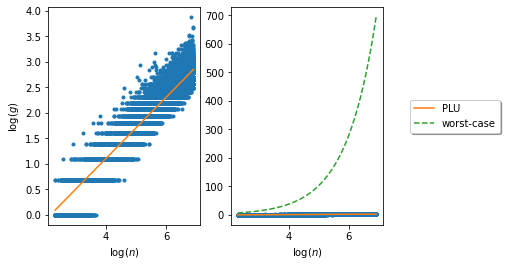

In [4]:
np.seterr(
    divide='ignore'
)  # turn off numpy runtime warning for now (for aesthetic reasons...)
n_array = np.arange(10, 1001)
n_array = np.repeat(n_array, 30)
growth = np.empty_like(n_array)
for i in np.arange(len(n_array)):
    p4 = part1(n_array[i])
    p4.growth()
    growth[i] = p4.growth

n_array = np.log(n_array)  # log transformation of n
growth = np.log(growth)  # log transformation of growth factors
# numerical errors might result in NaN or inf values, remove them before fitting a line
nan_or_inf = np.logical_or(np.isnan(growth), np.isinf(growth))
n_array = n_array[np.logical_not(nan_or_inf)]
growth = growth[np.logical_not(nan_or_inf)]

X = np.ones_like(n_array)  # add the column for intercept to the design matrix
X = np.concatenate((X.reshape(-1, 1), n_array.reshape(-1, 1)), axis=1)
fit1 = LinearRegression(fit_intercept=False).fit(X, growth)  # fit an OLS line
print("The coefficients for the fitted line (intercept, slope) are:\n",
      fit1.coef_)  # print coefficients for the fitted line

np.seterr(divide='warn')  # turn numpy runtime warning back on

fig, axs = plt.subplots(1, 2)
axs[0].plot(n_array, growth, '.')  #scatter plot
axs[0].plot(n_array, fit1.coef_[0] + fit1.coef_[1] * n_array, "-",
            label="PLU")  # plot fitted line for PLU
axs[0].set(xlabel=r"$\log(n)$", ylabel=r"$\log(g)$")
axs[1].plot(n_array, growth, '.')  #scatter plot
axs[1].plot(n_array, fit1.coef_[0] + fit1.coef_[1] * n_array, "-",
            label="PLU")  # plot fitted line for PLU
axs[1].plot(n_array, np.log(2) * np.exp(n_array), "--",
            label="worst-case")  # plot fitted line for worst-case
axs[1].set(xlabel=r"$\log(n)$")
plt.legend(loc='center right',
           bbox_to_anchor=(1.8, .5),
           ncol=1,
           fancybox=True,
           shadow=True)  # add a legend
plt.show()

## Problem 5
*Now we study the probability distribution of the growth factor for a ﬁxed $n$. Fix $n$, say $n = 10$ or $n = 16$, and generate an abundant number of random matrices, as in Step 2, to measure their growth factors. Then by subdividing the value-space of the growth factors into small subintervals of equal length, and by counting the number of matrices with growth factor lying in each of those subintervals, produce an approximation of the probability density function of the growth factor (the usual ”histogram” technique). Plot it against the growth factor value, with the vertical axis in logarithmic scale. Make a conjecture on how the probability density decays as the growth factor becomes large. Note that the number of matrices and the length of the subintervals should be so that most of the subintervals individually contain a large number of matrices, and that there are enough subintervals to give a meaningful approximation of the probability density function (i.e., the width of bars in the histogram must be small, but most of the bars must still include a large number of cases). Repeat the experiment for several values of $n$, say $n = 20, 40, 80$, or $n = 32, 64, 128$.*

**We generated $5000$ matrices for each $n$, and set the number of bins to be $50$. The histograms below have y axis being the frequency, plotted on a log scale; and x axis being the growth factor g. From the plots, we can observe that as growth factor becomes large, the pdf will decay slower than it decays as the growth factor approaches $0$; i.e., the r.v. has a heavier right tail. Together with the shape of the pdf, we make an educated guess that the growth factor might be a log-normal r.v. -- we made this guess for two extra reasons, that its support is non-negative, and that the r.v. seems to always have heavier right tail.**

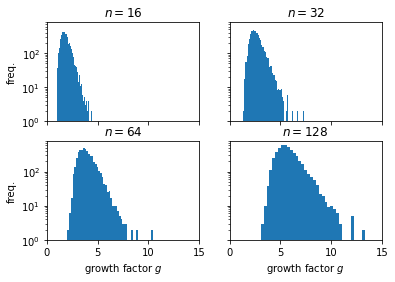

In [5]:
def growth_rv(n):
    '''
    Calculate growth factor for n by n matrix for 5000 times.
    '''
    growth_rv = np.empty(5000)
    for i in np.arange(5000):
        np.random.seed(i)  # set a seed
        p5 = part1(n)
        p5.growth()
        growth_rv[i] = p5.growth
    return growth_rv


fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(growth_rv(16), bins=50)
axs[0, 0].set()
axs[0, 0].set_title(r"$n=16$")
axs[0, 1].hist(growth_rv(32), bins=50)
axs[0, 1].set_title(r"$n=32$")
axs[1, 0].hist(growth_rv(64), bins=50)
axs[1, 0].set_title(r"$n=64$")
axs[1, 1].hist(growth_rv(128), bins=50)
axs[1, 1].set_title(r"$n=128$")

# set labels
for ax in axs.flat:
    ax.set_yscale('log')
    ax.set(xlim=[0, 15],
           ylim=[1, 800],
           xlabel=r"growth factor $g$",
           ylabel="freq.")
# organize the plots
for ax in axs.flat:
    ax.label_outer()

plt.show()

# PART 2
*Let $A$ be the $1000\times 1000$ tridiagonal symmetric matrix with $1, 2, . . . , 1000$ on the diagonal and $1$ on the sub- and super-diagonals, and let $b = \left(1, 1,\dots , 1\right)^T$.*

**All codes for functions to answer problems in Part 2 are included in the following class `part2`.**

**Based on first-order optimality condition, to use gradient descent or conjugate gradient solve the linear system is equivalent to solve convex minimization problem $$\min_{x\in\mathbb{R}^{1000}}\frac{1}{2}x^TAx-x^Tb$$ which has gradient $$\nabla_{x}\left(\frac{1}{2}x^TAx-x^Tb\right)=Ax-b$$ which is an affine function, therefore Lipschitz continuous with Lipschitz constant $$L=\lambda_{\max}\left(A\right)$$ Coming from optimization background, I tend to call steepest descent "gradient descent" -- please note this when looking at this part.**

In [6]:
A = np.zeros((1000, 1000))
np.fill_diagonal(A, np.arange(1, 1001))  # fill diagonal values
np.fill_diagonal(A[:, 1:], 1)  # fill super-diagonal values
np.fill_diagonal(A[1:], 1)  # fill sub-diagonal values


class part2:
    '''
    A class serves for part 2... It basically performs a given number steps of gradient descent or conjugate gradient for the given function above, with starting point being 0.
    '''
    def __init__(self, A, b, num_iter=1000):
        '''
        A:        floating point matrix; used in linear system Ax=b
        b:        floating point vector; used in linear system Ax=b
        num_iter: int scalar; number of iterations for the algorithm to run, with default value 1000
        '''
        self.A = A
        self.b = b
        self.num_iter = num_iter
        self.x0 = np.zeros(A.shape[1])  # the starting point is 0
        self.CG_computed_r, self.CG_actual_r, self.gd_r = np.zeros(
            num_iter + 1), np.zeros(num_iter + 1), np.zeros(num_iter + 1)
        self.CG_computed_r[0], self.CG_actual_r[0], self.gd_r[0] = [
            np.linalg.norm(b)
        ] * 3
        # the LOG VALUE of residual norms estimate is calculated below; log value is used to improve numerical stability
        self.kappa = np.linalg.cond(self.A)
        self.kappa_frac_log = np.log(np.sqrt(self.kappa) -
                                     1) - np.log(np.sqrt(self.kappa) + 1)
        self.est = np.arange(self.num_iter + 1)
        self.est = self.kappa_frac_log * self.est + np.log(2)

    def eval_grad(self):
        '''
        Evaluate gradient for the current values of self.x.
        '''
        self.grad = self.A @ self.x - self.b

    def vanilla_grad(self):
        '''
        (Problem 1) Perform gradient descent with starting point self.x0 and step size 1/L for the objective mentioned above.
        '''
        self.x = self.x0  # initialize self.x within functions s.t. it's possible to perform gradient descent and CG for one class
        self.eval_grad()
        L = np.max(
            np.linalg.eigvals(self.A)
        )  # set Lipschitz constant to be local to our function because it's useless for CG
        for k in np.arange(1, self.num_iter + 1):
            self.x -= self.grad / L  # take step size 1/L
            self.eval_grad()
            self.gd_r[k] = np.linalg.norm(
                self.grad
            )  # note the residual concides with the negative gradient
        return self.x

    def CG(self):
        '''
        (Problem 2) Perform conjugate gradient for linear system Ax=b.
        '''
        self.x = self.x0
        self.eval_grad()
        r = -self.grad
        p = r.copy()
        for k in np.arange(1, self.num_iter + 1):
            alpha = (r.T @ r) / (p.T @ self.A @ p)
            self.x += alpha * p
            r_temp = r.copy(
            )  # because we still need the residual from previous iteration shortly after
            r -= alpha * self.A @ p
            beta = (r.T @ r) / (r_temp.T @ r_temp)
            p = r + beta * p
            # calculate residual norms
            self.CG_computed_r[k] = np.linalg.norm(r)
            self.eval_grad()
            self.CG_actual_r[k] = np.linalg.norm(self.grad)
        return self.x

## Problem 1
*Write a code that performs $1000$ (or more) steps of the steepest descent iteration to approximately solve $Ax = b$.*

**Gradient descent (steepest descent) with constant step size $\frac{1}{L}$ is deployed. See above class `part2` for codes. The function for this problem is `part2.vanilla_grad`.**

## Problem 2
*Write a code that performs $1000$ steps of the CG to approximately solve $Ax = b$.*

**See above class `part2` for codes. The function for this problem is `part2.CG`.**

## Problem 3
*Produce a plot with four curves on it:*

- *the computed residual norms $\left\Vert r_{i}\right\Vert _{2}$ for CG,*
- *the actual residual norms $\left\Vert b-Ax_{i}\right\Vert _{2}$ for CG,*
- *the residual norms $\left\Vert r_{i}\right\Vert _{2}$ for steepest descent, and*
- *the estimate $\frac{2\left(\sqrt{\kappa}-1\right)^{i}}{\left(\sqrt{\kappa}+1\right)^{i}}$, where $\kappa=\left\Vert A\right\Vert \left\Vert A^{-1}\right\Vert $ is the $2$-norm condition number of $A$ (which can be estimated by `NumPy` function `linalg.cond`), and $i$ is the iteration number that is to be on the horizontal axis of the plot.*

*Choose logarithmic scale for the vertical axis if appropriate.*

**We used $\log$ scale for vertical axis and plotted the four lines below.**

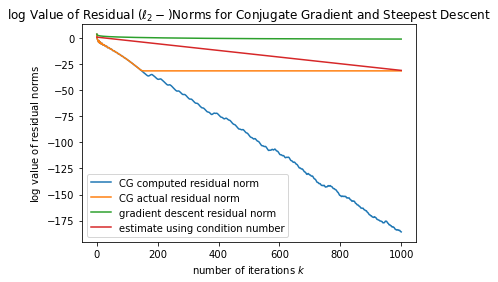

In [7]:
p3 = part2(A=A, b=np.ones(1000))
p3.vanilla_grad()
p3.CG()

plt.plot(np.log(p3.CG_computed_r), label="CG computed residual norm")
plt.plot(np.log(p3.CG_actual_r), label="CG actual residual norm")
plt.plot(np.log(p3.gd_r), label="gradient descent residual norm")
plt.plot(
    p3.est, label="estimate using condition number"
)  # recall that for numerical stability, we actually calculated the log value of estimate instead of the estiamte itself back then
plt.xlabel(r"number of iterations $k$")
plt.ylabel(r"$\log$ value of residual norms")
plt.title(
    r"$\log$ Value of Residual ($\ell_2-)$Norms for Conjugate Gradient and Steepest Descent"
)
plt.legend()

plt.show()

## Problem 4
*Comment on your results.*

- **For rate of convergence of the algorithm itself, recall that CG converges faster than gradient descent *in theory* -- we can more or less observe that here: at the beginning part of the trajectory, the actual residual norms for CG(orange line) descents faster than that of gradient descent(green line);**
- **For numerical stability comparison, CG is much more numerically stable than steepest descent: note that the orange line is much lower than the green line. The CG actual residual norm is lower than the residual norm estimate(red line), while the estimate itself is then lower than the green line. This suggests that CG is very numerical stable. Recall the vertical axis is on $\log$ scale, the CG actual residual norm appears liner in the plot. In fact, the residual norm for steepest descent does not show any decrease by the number of iterations $k$ -- recall that steepest descent is not very numerical stable for linear systems, especially not for our problem here;**
- **Specifically for CG, note that the computed residual $r_i$ is actually numerically more stable than the "actual" residual $b-Ax_i$ -- this is interesting to see, as we expected to observe the $\ell_2-$norm of the residual "monotonically decreases" [1]; on the other hand, note that the actual residual norm stops decreasing at $e^{-32}$, which we believe is actually due to machine precision of computing $b-Ax_i$.**

# References

[1]. T. Washizawa, "On the Behavior of the Residual in Conjugate Gradient Method," Applied Mathematics, Vol. 1 No. 3, 2010, pp. 211-214. doi: 10.4236/am.2010.13025.